# 线性回归实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b , num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) +b
    y+= torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-0.3838,  0.9946]) 
label: tensor([0.0351])


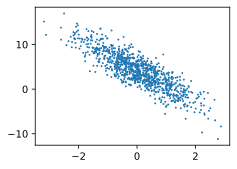

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.6743,  2.1182],
        [-1.1479,  1.5998],
        [ 1.5291, -0.1695],
        [ 0.2670, -0.0218],
        [ 0.2980, -0.3639],
        [ 0.9149,  0.6553],
        [-0.5380,  1.0060],
        [-0.4596,  1.0225],
        [-0.2693, -0.2343],
        [ 0.1361,  1.0765]]) 
 tensor([[-1.6558],
        [-3.5455],
        [ 7.8328],
        [ 4.8127],
        [ 6.0243],
        [ 3.8090],
        [-0.2928],
        [-0.1955],
        [ 4.4657],
        [ 0.8289]])


In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 /2

In [9]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size=batch_size, features=features, labels=labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch {epoch + 1}, loss {float(train_l.mean())}")

epoch 1, loss 0.04580709710717201
epoch 2, loss 0.00018454607925377786
epoch 3, loss 5.3164905693847686e-05


In [10]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0006, -0.0009], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)


In [11]:
x = torch.tensor([1.0], requires_grad=True)
y = x * 2
y.retain_grad()  # 显式要求保留y的梯度
z = y * 3   
z.backward()  
print(x.grad)
print(y.grad)
# print(z.grad)
x.grad.zero_()

tensor([6.])
tensor([3.])


tensor([0.])

In [12]:
x = torch.tensor([1.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)

for epoch in range(100):
    # 前向传播
    y = x * 2
    z = y * 3
    
    # 反向传播前清零
    optimizer.zero_grad()  # 或 x.grad.zero_()
    
    # 反向传播
    z.backward()
    
    # 更新参数
    optimizer.step()
    
    # 打印最新x的值
    print(f"Epoch {epoch + 1}, x = {x.item()}")


Epoch 1, x = 0.9399999976158142
Epoch 2, x = 0.8799999952316284
Epoch 3, x = 0.8199999928474426
Epoch 4, x = 0.7599999904632568
Epoch 5, x = 0.699999988079071
Epoch 6, x = 0.6399999856948853
Epoch 7, x = 0.5799999833106995
Epoch 8, x = 0.5199999809265137
Epoch 9, x = 0.4599999785423279
Epoch 10, x = 0.3999999761581421
Epoch 11, x = 0.3399999737739563
Epoch 12, x = 0.2799999713897705
Epoch 13, x = 0.21999996900558472
Epoch 14, x = 0.15999996662139893
Epoch 15, x = 0.09999996423721313
Epoch 16, x = 0.03999996557831764
Epoch 17, x = -0.02000003308057785
Epoch 18, x = -0.08000002801418304
Epoch 19, x = -0.14000003039836884
Epoch 20, x = -0.20000003278255463
Epoch 21, x = -0.2600000202655792
Epoch 22, x = -0.320000022649765
Epoch 23, x = -0.3800000250339508
Epoch 24, x = -0.4400000274181366
Epoch 25, x = -0.5
Epoch 26, x = -0.5600000023841858
Epoch 27, x = -0.6200000047683716
Epoch 28, x = -0.6800000071525574
Epoch 29, x = -0.7400000095367432
Epoch 30, x = -0.800000011920929
Epoch 31, x = -

In [13]:
# 寻找二次函数的最小值点
def quadratic(x):
    return x**2 + 2*x + 1

x = torch.tensor([5.0], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.1)

for epoch in range(100):
    loss = quadratic(x)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}, x = {x.item()}, loss = {loss.item()}")

print(f"最小值点: x = {x.item()}")

Epoch 1, x = 3.799999952316284, loss = 36.0
Epoch 2, x = 2.8399999141693115, loss = 23.03999900817871
Epoch 3, x = 2.072000026702881, loss = 14.745599746704102
Epoch 4, x = 1.4575999975204468, loss = 9.43718433380127
Epoch 5, x = 0.9660799503326416, loss = 6.039797782897949
Epoch 6, x = 0.5728639364242554, loss = 3.8654704093933105
Epoch 7, x = 0.2582911550998688, loss = 2.4739010334014893
Epoch 8, x = 0.0066329240798950195, loss = 1.5832966566085815
Epoch 9, x = -0.1946936696767807, loss = 1.0133098363876343
Epoch 10, x = -0.35575494170188904, loss = 0.6485183238983154
Epoch 11, x = -0.4846039414405823, loss = 0.4150516986846924
Epoch 12, x = -0.5876831412315369, loss = 0.26563310623168945
Epoch 13, x = -0.6701465249061584, loss = 0.170005202293396
Epoch 14, x = -0.7361172437667847, loss = 0.10880327224731445
Epoch 15, x = -0.7888938188552856, loss = 0.0696340799331665
Epoch 16, x = -0.8311150670051575, loss = 0.044565796852111816
Epoch 17, x = -0.8648920655250549, loss = 0.0285221338